# ITS307 Data Analytics                                                   : Spring Semester 2022
# Practical 6
# Regularization
![image.png](attachment:image.png)

# 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib as plt 
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


In [2]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# 2. Load Data

In [3]:
df = pd.DataFrame(data=boston.data,columns=boston.feature_names)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [4]:
X = boston.data
y = boston.target

# 3. Train test split

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

# 4. Simple Linear Model

In [6]:
model = LinearRegression()

In [7]:
model.fit(X_train,y_train)
model

LinearRegression()

In [8]:
model.score(X_train,y_train)

0.7469523022379234

In [9]:
model.score(X_test,y_test)

0.713519942762758

# 5. Ridge Regularization for Linear Model

In [10]:
from sklearn.linear_model import Ridge

In [11]:
modelr = Ridge(alpha=100)
modelr.fit(X_train,y_train)
modelr.score(X_train,y_train)

0.7140989466570957

In [12]:
modelr.score(X_test,y_test)

0.7004724477946698

# 6. Lasso Regularization for Linear Model

In [13]:
from sklearn.linear_model import Lasso
modelL = Lasso(alpha=0.1)
modelL.fit(X_train,y_train)
modelL.score(X_train,y_train)

0.7290775403198713

In [14]:
modelL.score(X_test,y_test)

0.7106421063025732

# 7. Polynomial Regression of degree 2

In [15]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
X_train_poly = pf.fit_transform(X_train)
X_test_poly = pf.fit_transform(X_test)

In [16]:
model = LinearRegression()
model.fit(X_train_poly, y_train)
model.score(X_train_poly, y_train)

0.7531952330102551

In [17]:
model.score(X_test_poly, y_test)

0.4375185194147031

# 8. Ridge Regularization for Polynomial model

In [18]:
modelrp = Ridge(alpha=100000000)
modelrp.fit(X_train_poly,y_train)
modelrp.score(X_train_poly,y_train)

0.6915252141954923

In [19]:
modelrp.score(X_test_poly,y_test)

0.686929361278267

# 9. Lasso Regularization for Polynomial model

In [20]:
modelrpl = Lasso(alpha=10)
modelrpl.fit(X_train_poly,y_train)
modelrpl.score(X_train_poly,y_train)

/Users/sonamchoki/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2329.0784749235877, tolerance: 3.0392616073446326
  model = cd_fast.enet_coordinate_descent(


0.8722157313692629

In [21]:
modelrpl.score(X_test_poly,y_test)

0.7689327540182131

# 10. Select K Best

In [22]:
kb = SelectKBest(score_func=f_regression, k=7)
x_selected = kb.fit_transform(X_train, y_train)
x_selected.shape

(354, 7)

In [23]:
lrk = LinearRegression()
lrk.fit(x_selected,y_train)
lrk.score(x_selected,y_train)

0.6913585708496404

In [24]:
pf = PolynomialFeatures(degree=2)
X_train_poly = pf.fit_transform(X_train)
X_test_poly = pf.fit_transform(X_test)

In [25]:
model = LinearRegression()
model.fit(X_train_poly, y_train)
model.score(X_train_poly, y_train)

0.7531952330102551

In [26]:
traindf = pd.DataFrame(data=X_train, columns=boston.feature_names)
tdf = pd.DataFrame(data=X_test, columns=boston.feature_names)
traindf['target']= y_train

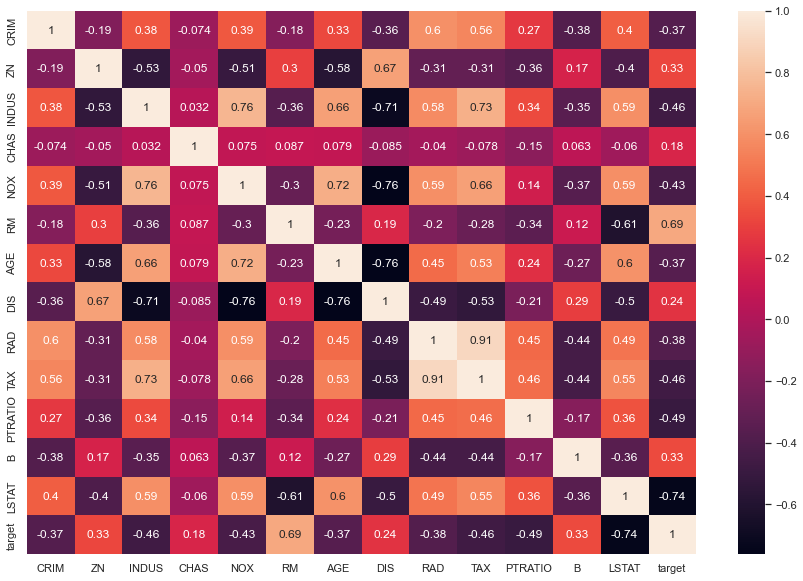

In [27]:
import seaborn as sns
from matplotlib import pyplot as plt
corr = traindf.corr()
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data= corr,annot=True)
plt.show()


In [28]:
select_columns = ['CRIM','INDUS','NOX','RM','TAX','PTRATIO','LSTAT']
train_select = traindf[select_columns]
test_select = tdf[select_columns]
test_select.head()


CRIM  INDUS     NOX     RM    TAX  PTRATIO  LSTAT
0  8.98296  18.10  0.7700  6.212  666.0     20.2  17.60
1  0.11027   5.13  0.4530  6.456  284.0     19.7   6.73
2  0.09849  25.65  0.5810  5.879  188.0     19.1  17.58
3  0.02763   2.95  0.4280  6.595  252.0     18.3   4.32
4  0.01951   1.38  0.4161  7.104  216.0     18.6   8.05

In [29]:
kmodel = LinearRegression()
kmodel.fit(train_select, y_train)
kmodel.score(train_select,y_train)

0.6904901176314548

In [30]:
kmodel.score(test_select,y_test)

0.6525689634070801

# 11. Conclusion

There is an overfitting problem when using linear regression. As a result, we used regularization to remove the overfitting. We implemented the ridge and lasso technique for regularization. We used a polynormal feature with a degree of 2 to improve the accuracy. We used the ridge and lasso to remove any remaining overfitting. We used selectkbest to acquire a high accuracy because the accuracy didn't alter substantially.
